In [1]:
import pandas as pd
import seaborn as sns 

In [2]:
df = pd.read_csv("Most Popular Programming Languages.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    249 non-null    object
 1   Python Worldwide(%)      249 non-null    int64 
 2   JavaScript Worldwide(%)  249 non-null    int64 
 3   Java Worldwide(%)        249 non-null    int64 
 4   C# Worldwide(%)          249 non-null    int64 
 5   PhP Worldwide(%)         249 non-null    int64 
 6   Flutter Worldwide(%)     249 non-null    int64 
 7   React Worldwide(%)       249 non-null    int64 
 8   Swift Worldwide(%)       249 non-null    int64 
 9   TypeScript Worldwide(%)  249 non-null    int64 
 10  Matlab Worldwide(%)      249 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 21.5+ KB


In [3]:
df.Month = pd.to_datetime(df["Month"])

df.rename(columns={"Month": "Date"}, inplace=True)


In [4]:
df.head(3)

,Date,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
0,2004-01-01,30,98,96,76,100,6,1,9,2,78
1,2004-02-01,29,98,97,86,99,6,2,9,1,91
2,2004-03-01,28,100,100,87,97,5,2,9,2,99


In [5]:
df.insert(1, "Month_name", df['Date'].dt.month_name())
df.insert(2, "Year", df['Date'].dt.year )
df.insert(3, "format_date", df['Date'].dt.strftime('%b %Y'))

df.head(3)

,Date,Month_name,Year,format_date,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
0,2004-01-01,January,2004,Jan 2004,30,98,96,76,100,6,1,9,2,78
1,2004-02-01,February,2004,Feb 2004,29,98,97,86,99,6,2,9,1,91
2,2004-03-01,March,2004,Mar 2004,28,100,100,87,97,5,2,9,2,99


In [6]:
import matplotlib.pyplot as plt

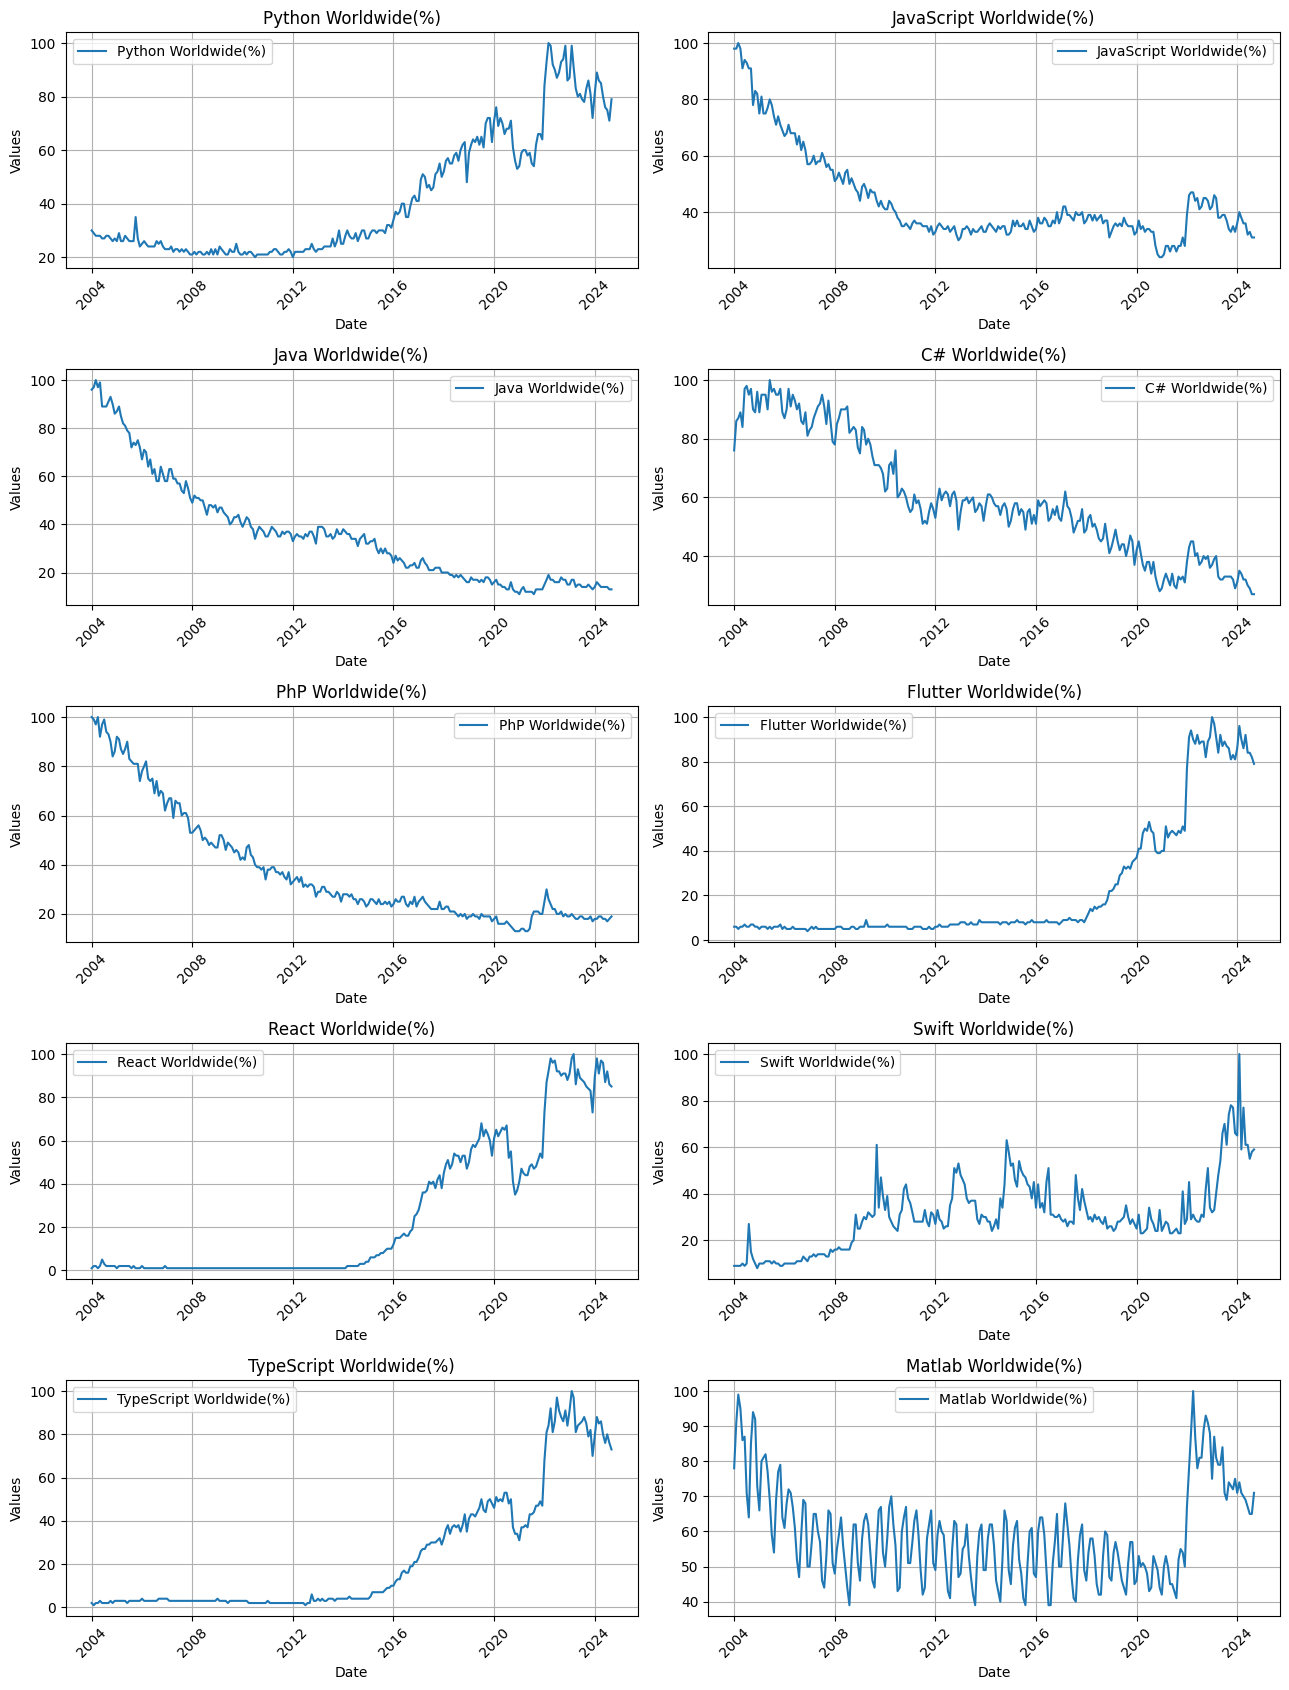

In [7]:
languages = [
    'Python Worldwide(%)',
    'JavaScript Worldwide(%)',
    'Java Worldwide(%)',
    'C# Worldwide(%)',
    'PhP Worldwide(%)',
    'Flutter Worldwide(%)',
    'React Worldwide(%)',
    'Swift Worldwide(%)',
    'TypeScript Worldwide(%)',
    'Matlab Worldwide(%)'
]


fig, axs = plt.subplots(5, 2, figsize=(13, 17))  
axs = axs.flatten()  


for i, language in enumerate(languages):
    axs[i].plot(df['Date'], df[language], label=language)
    axs[i].set_title(language)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Values')
    axs[i].tick_params(axis='x', rotation=45)  
    axs[i].grid(True)  
    axs[i].legend() 


plt.tight_layout()
plt.show()


In [8]:
df.head(3)

,Date,Month_name,Year,format_date,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
0,2004-01-01,January,2004,Jan 2004,30,98,96,76,100,6,1,9,2,78
1,2004-02-01,February,2004,Feb 2004,29,98,97,86,99,6,2,9,1,91
2,2004-03-01,March,2004,Mar 2004,28,100,100,87,97,5,2,9,2,99


In [9]:
#% zmena 
df['percent_change'] = ( (df['Python Worldwide(%)'] - df['Python Worldwide(%)'].shift(1)) /  df['Python Worldwide(%)'].shift(1) * 100)
df.head(3)

,Date,Month_name,Year,format_date,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%),percent_change
0,2004-01-01,January,2004,Jan 2004,30,98,96,76,100,6,1,9,2,78,NaN
1,2004-02-01,February,2004,Feb 2004,29,98,97,86,99,6,2,9,1,91,-3.333333
2,2004-03-01,March,2004,Mar 2004,28,100,100,87,97,5,2,9,2,99,-3.448276


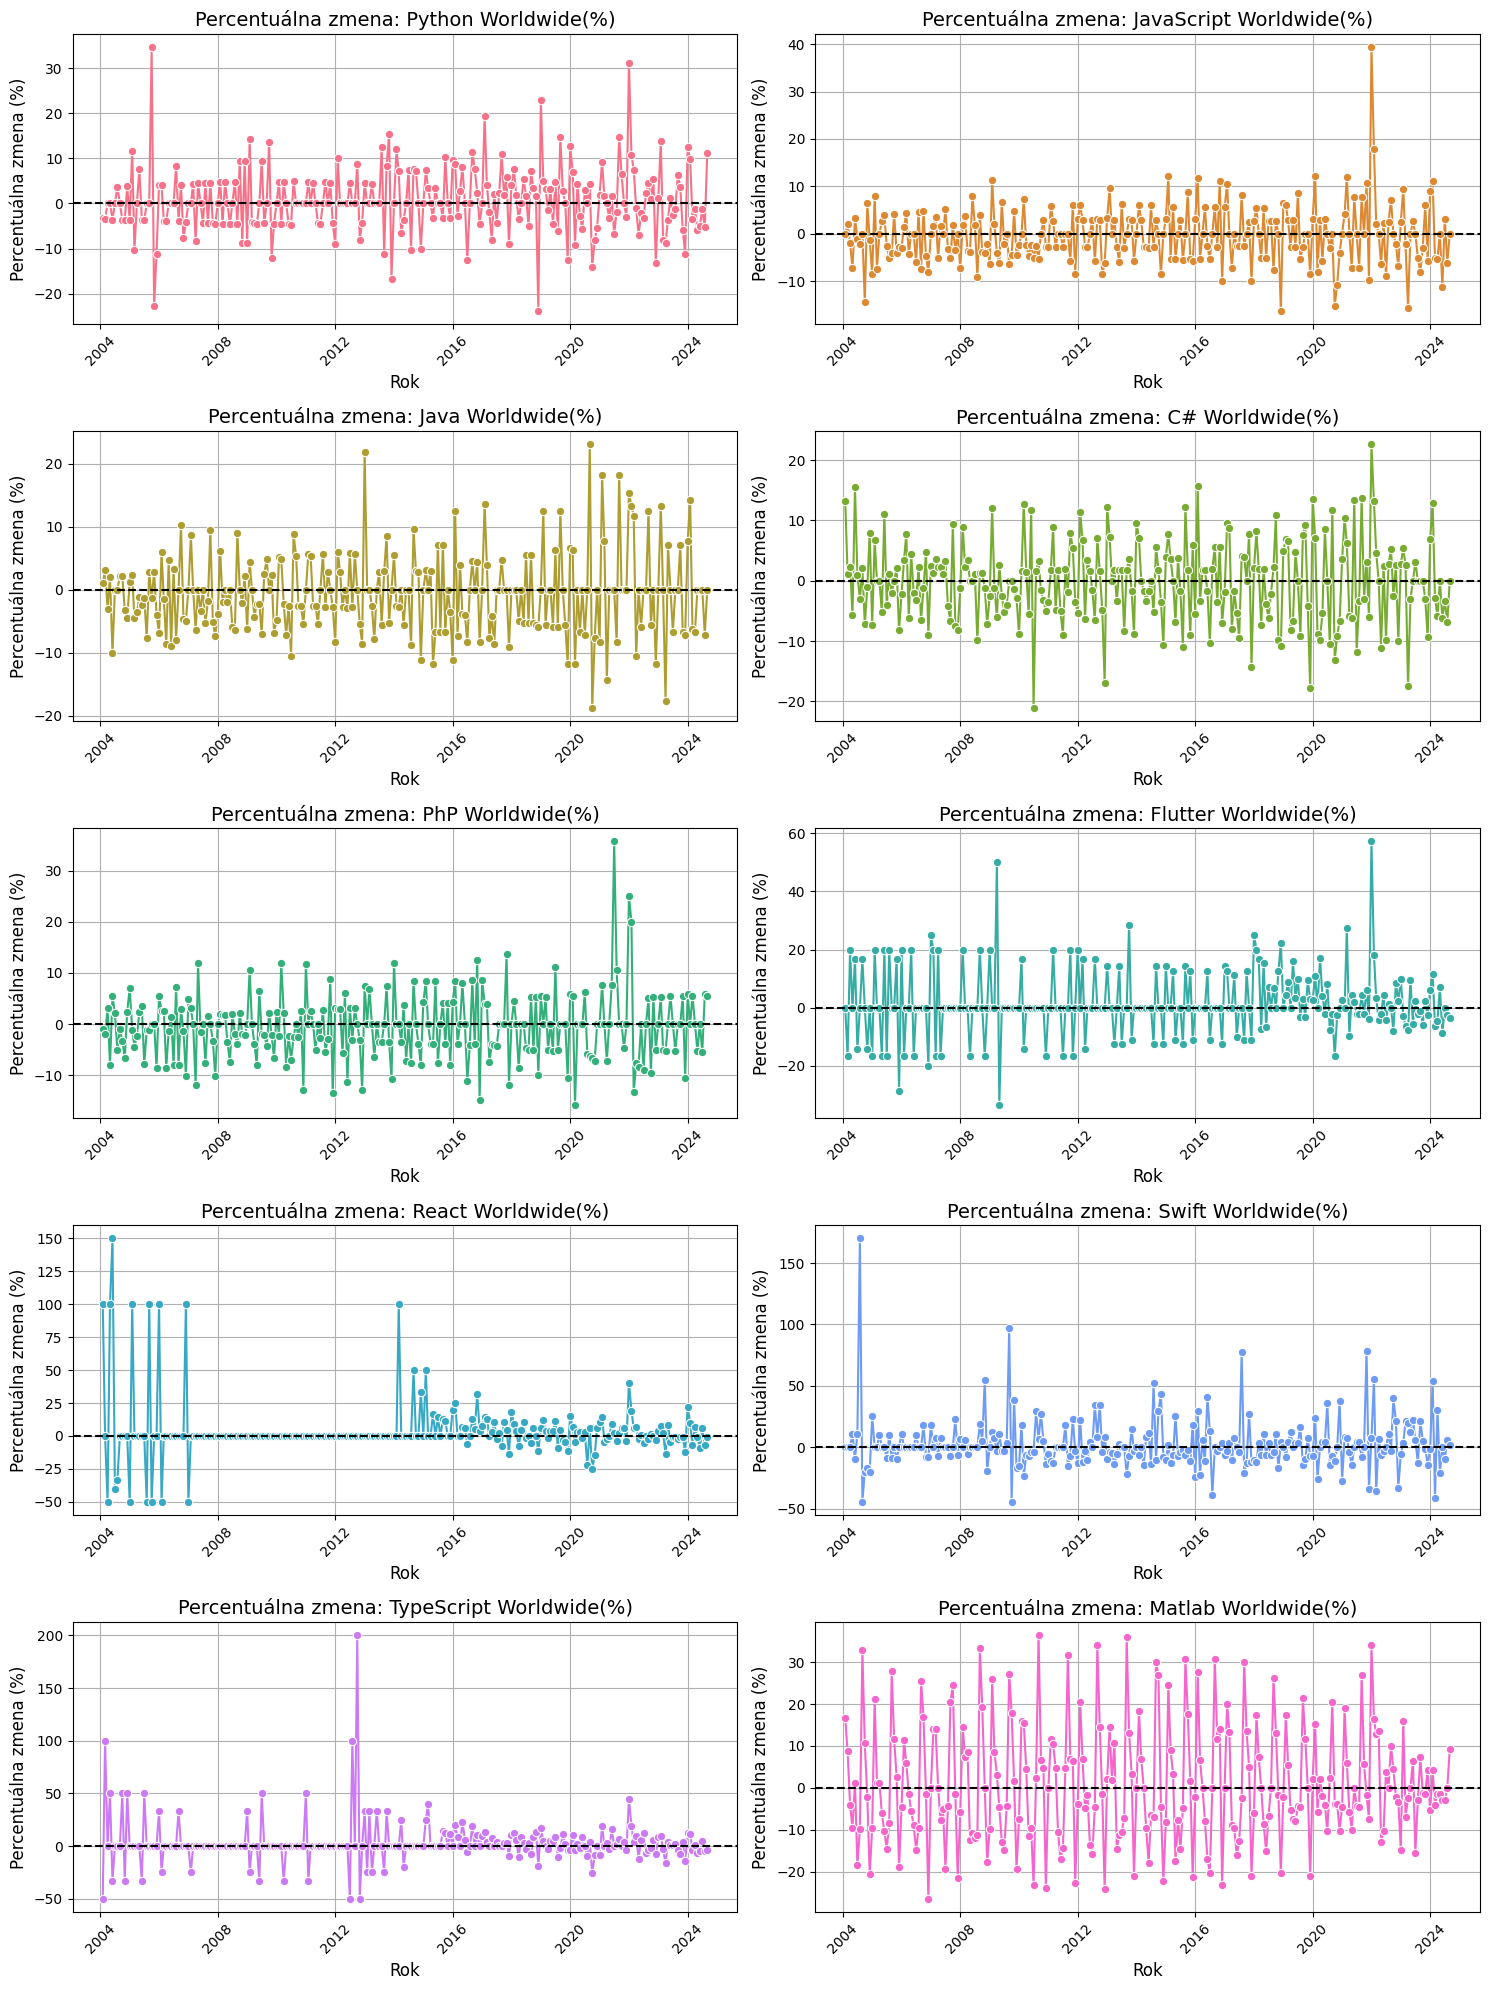

In [10]:
for language in languages:
    df[f'percent_change_{language}'] = ((df[language] - df[language].shift(1)) / df[language].shift(1) * 100)


fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

# Iterácia cez jednotlivé jazyky a pridanie grafov
for i, language in enumerate(languages):
    sns.lineplot(data=df, x='Date', y=f'percent_change_{language}', ax=axs[i], marker='o', color=sns.color_palette("husl", len(languages))[i])
    axs[i].set_title(f'Percentuálna zmena: {language}', fontsize=14)
    axs[i].set_xlabel('Rok', fontsize=12)
    axs[i].set_ylabel('Percentuálna zmena (%)', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].axhline(0, color='black', linestyle='--')  
    axs[i].grid(True)

plt.tight_layout()
plt.show()